<a href="https://colab.research.google.com/github/chaos44/machine_tutorial/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# scikit-learnチュートリアル
# 重回帰分析

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

boston = load_boston()
env_data = pd.DataFrame(boston.data,columns = boston.feature_names)
price_data = boston.target

In [4]:
print(env_data)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [12]:
# 実際の値段
print(price_data[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [7]:
lr = LinearRegression(fit_intercept = True)

In [9]:
# 計算式、モデルの作成
lr.fit(env_data,price_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# 予測
forecast = lr.predict(env_data)
print(forecast[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


In [14]:
# 誤差分析
ERROR = (forecast - price_data) / price_data

#実際の価格に対して、平均誤差
print(np.mean(np.abs(ERROR))*100)
#16.431734487377376(%)

#最大の誤差
print(np.max(np.abs(ERROR))*100)
#161.18584774173794(%)

16.417298806489978
161.1615815597842


In [15]:
# 画像認識チュートリアル
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [16]:
# kerasのMNISTデータの取得
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [17]:
# 配列の整形と，色の範囲を0-255 -> 0-1に変換
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

In [18]:
# 正解ラベルをダミー変数に変換
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
# ネットワークの定義
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
        ])

In [20]:
# 損失関数，最適化アルゴリズムなどの設定 + モデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
# 学習処理の実行 -> 変数histに進捗の情報が格納される
# validation_split=0.1 ---> 0.1(10%)の訓練データが交差検証に使われる
hist = model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=3, validation_split=0.1)

Epoch 1/3
270/270 [==============================] - 3s 10ms/step - loss: 2.0766 - accuracy: 0.4948 - val_loss: 1.8461 - val_accuracy: 0.7097
Epoch 2/3
270/270 [==============================] - 3s 10ms/step - loss: 1.6876 - accuracy: 0.7148 - val_loss: 1.4851 - val_accuracy: 0.7980
Epoch 3/3
270/270 [==============================] - 3s 10ms/step - loss: 1.3832 - accuracy: 0.7657 - val_loss: 1.2082 - val_accuracy: 0.8378


In [22]:
# 予測
score = model.evaluate(X_test, y_test, verbose=1)
print("")
print('test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.2354 - accuracy: 0.8089

test accuracy :  0.808899998664856


[0.0331052  0.03457246 0.02884706 0.0568063  0.0792291  0.05641828
 0.02971022 0.5121423  0.03785091 0.13131815]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


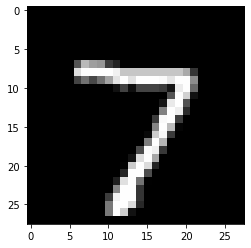

In [49]:
predictions = model.predict(X_test)
print(predictions[0])
print(y_test[0])
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')

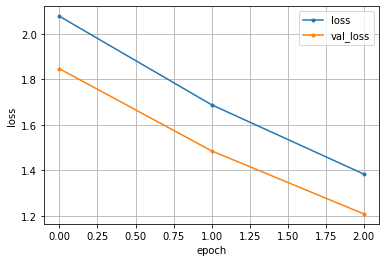

In [23]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.plot(range(3), loss, marker='.', label='loss')
plt.plot(range(3), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

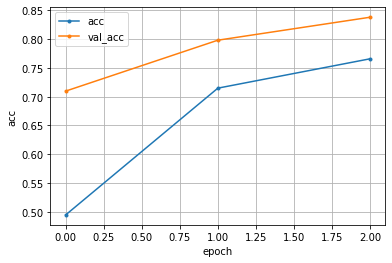

In [26]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# accuracyのグラフ
plt.plot(range(3), acc, marker='.', label='acc')
plt.plot(range(3), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()